<h1>Data Visualization and Machine Learning Metric Analysis for Titanic Dataset on Kaggle</h1>

<p>Exploratory Data Analysis or EDA is the art of gathering information about how the data is present and how it's different fields are related. If done correctly it could give useful insight about data and eventually help in directions to take to carry our extensive statistical analysis. It could help in formulate and then test hypothesis that one might have. 
Therefore EDA becomes an important part of any data science/ machine learning project.</p>

In [44]:
#packages needed for handling data
import numpy as np 
import pandas as pd
#plotting packages/libraries
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# libraries for analysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix


In [45]:
df=pd.read_csv('train.csv')

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# outliers could be judged if looking at the 75th percentile and max values differ by much. Same for the bottom end 
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
# lets see the dimension of our dataset and how much information is missing
df.shape
df.info()
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<p> At this stage we have a pretty good idea about how should we proceed with certain columns. Cabin column has the major amount of entries as nan followed by Age. Now for Age we could replace the missing values with mean but we would do something smart because if we have a child replacing it with mean lets say 35 would not be a rational choice. 
Other than that we should now look at what can we infer graphically from other features </p>

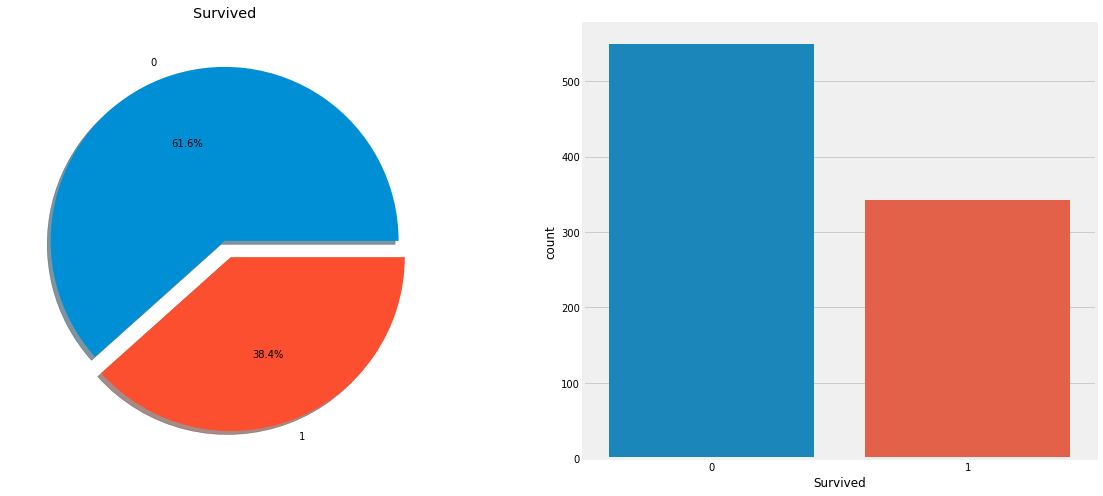

In [49]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df)
plt.show()


<p> We can see that about 62 percent of the passengers aboard did not survive. So naively if we predict nobody survived then the accuracy of our prediction would be about 60 percent. This is our motivation to do better. Now since we have taken up survival , we would try to dive deep into this feature.

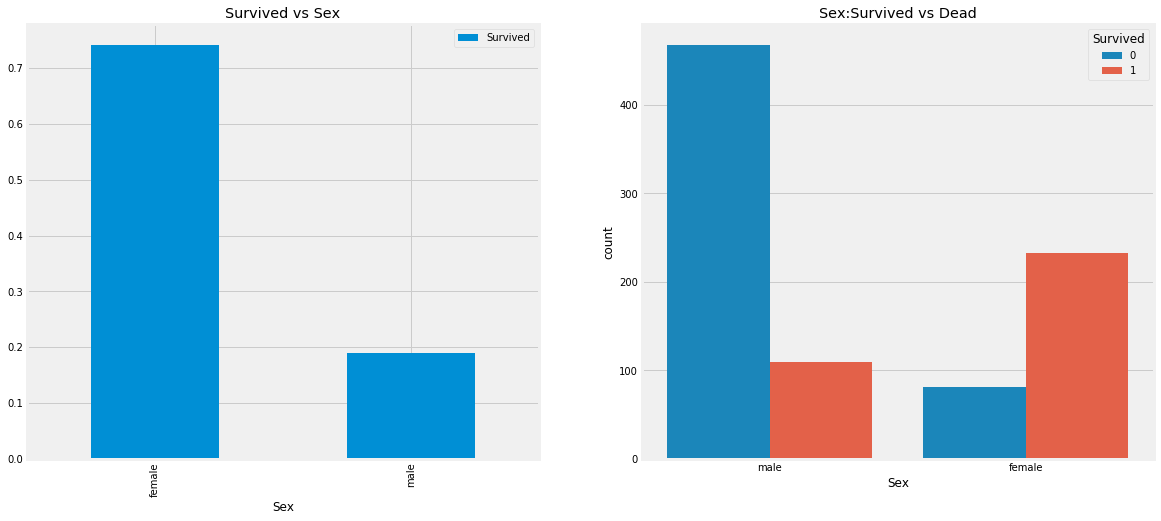

In [50]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=df,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()


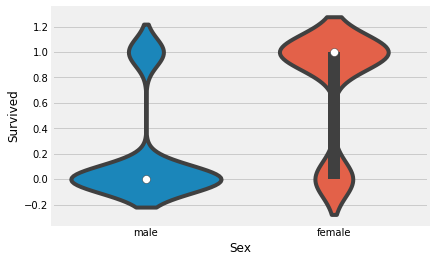

In [51]:
sns.violinplot(x='Sex',y='Survived',data=df)

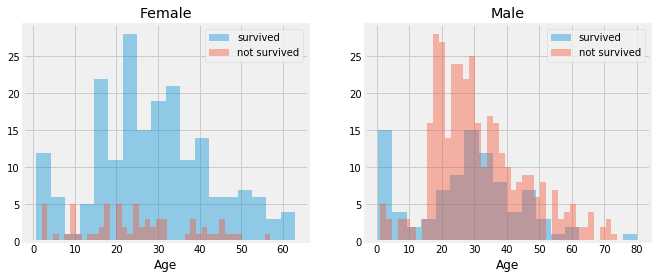

In [52]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

<p> These plots reveal an interesting insight about proceeding forward. Women in general had a high survival rate. This could be attributed to a saying in emergency "Women and Children first" . Also Age seems like one of the important factor when we are talking about survival.</p>


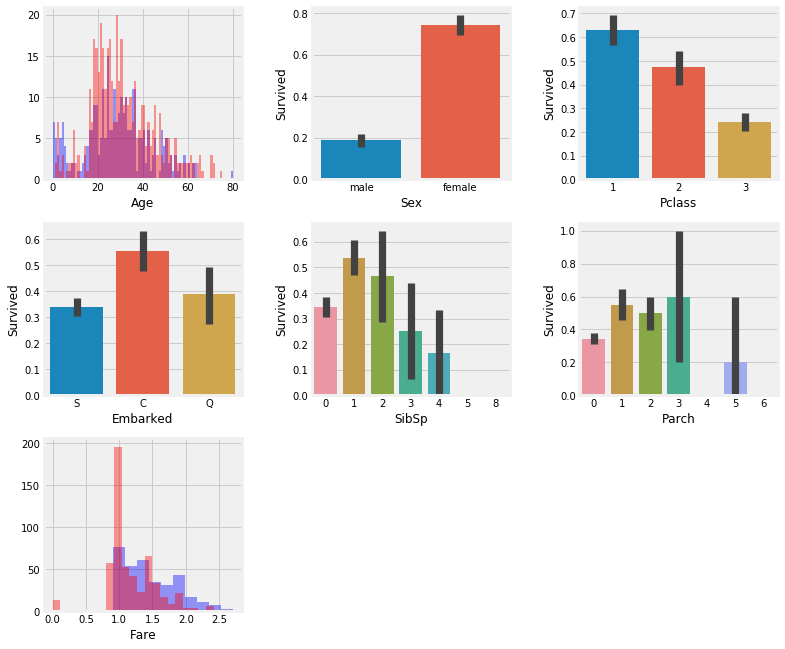

In [53]:
surv = df[df['Survived']==1]
nosurv = df[df['Survived']==0]
plt.figure(figsize=[12,10])
plt.subplot(331)
sns.distplot(surv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color="blue")
sns.distplot(nosurv['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color="red",
            axlabel='Age')
plt.subplot(332)
sns.barplot('Sex', 'Survived', data=df)
plt.subplot(333)
sns.barplot('Pclass', 'Survived', data=df)
plt.subplot(334)
sns.barplot('Embarked', 'Survived', data=df)
plt.subplot(335)
sns.barplot('SibSp', 'Survived', data=df)
plt.subplot(336)
sns.barplot('Parch', 'Survived', data=df)
plt.subplot(337)
sns.distplot(np.log10(surv['Fare'].dropna().values+1), kde=False, color="blue")
sns.distplot(np.log10(nosurv['Fare'].dropna().values+1), kde=False, color="red",axlabel='Fare')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)



<p> Let us try to look at some plots regarding some features I think are tied to the survival of a person</p>

<h3>Chance of Survival based on Port</h3>

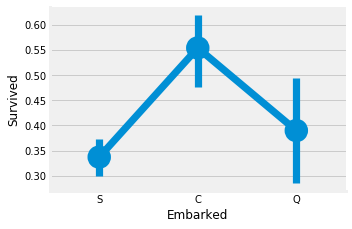

In [54]:
sns.factorplot('Embarked','Survived',data=df)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

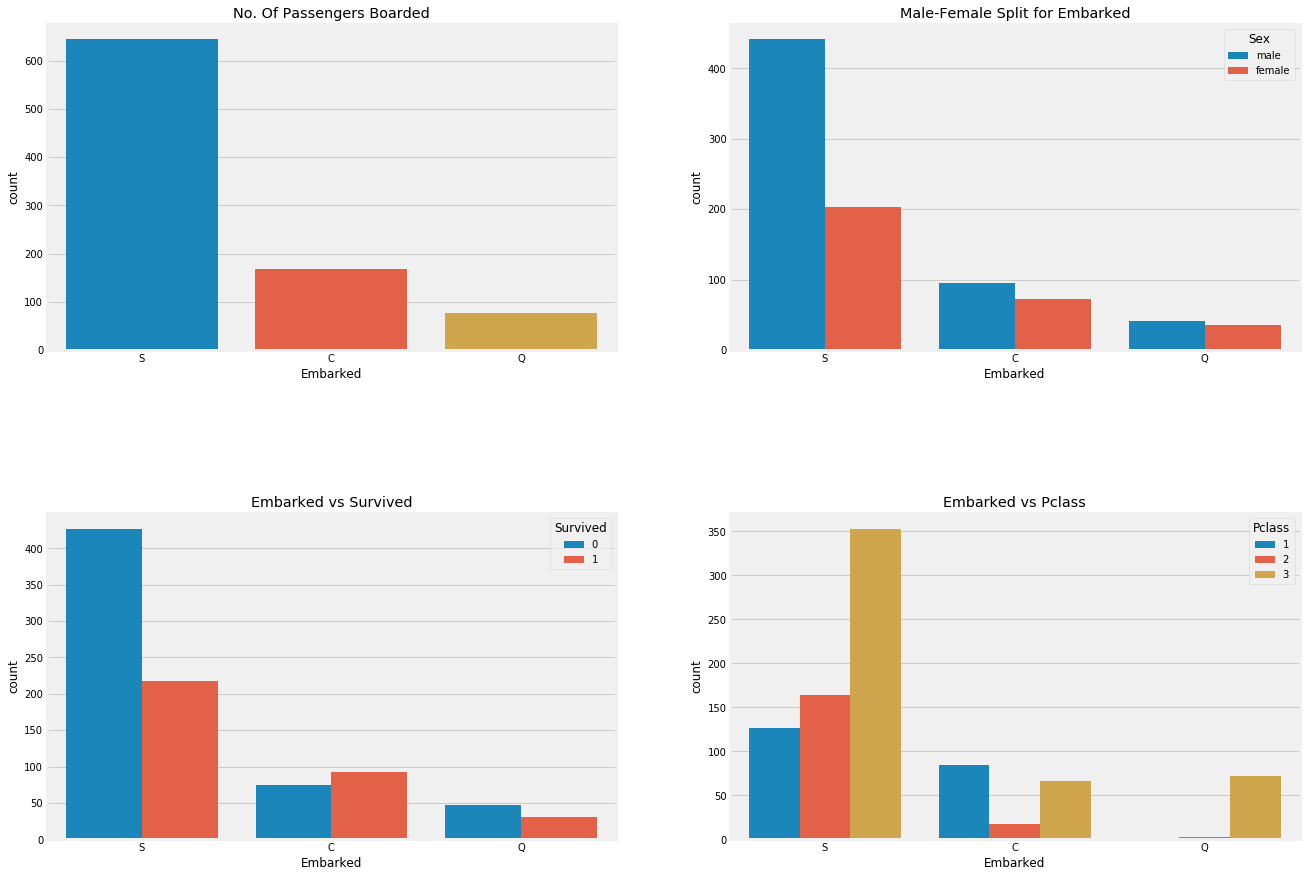

In [55]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=df,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=df,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=df,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=df,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

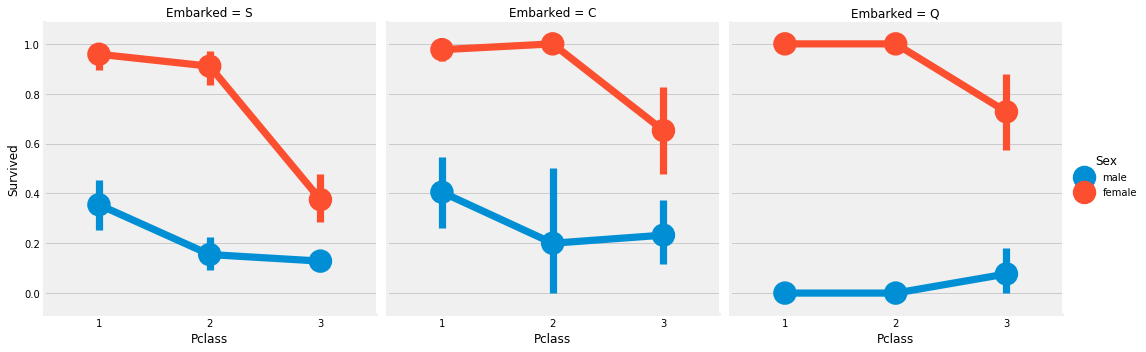

In [56]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df)
plt.show()

<h3>Let us look at Siblings and Number of Parents aboard and check the Survival Rate</h3>

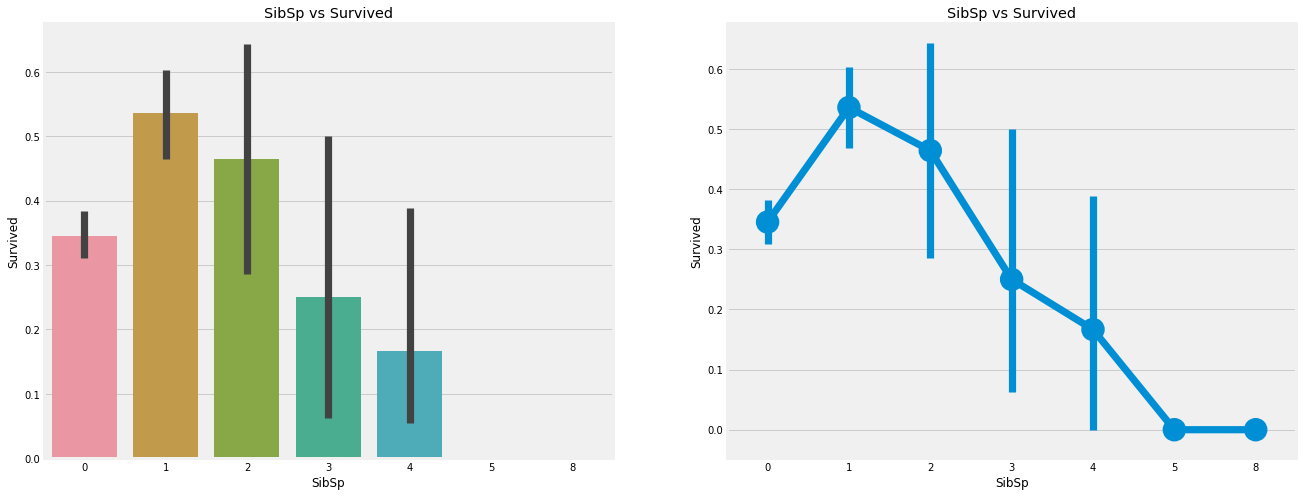

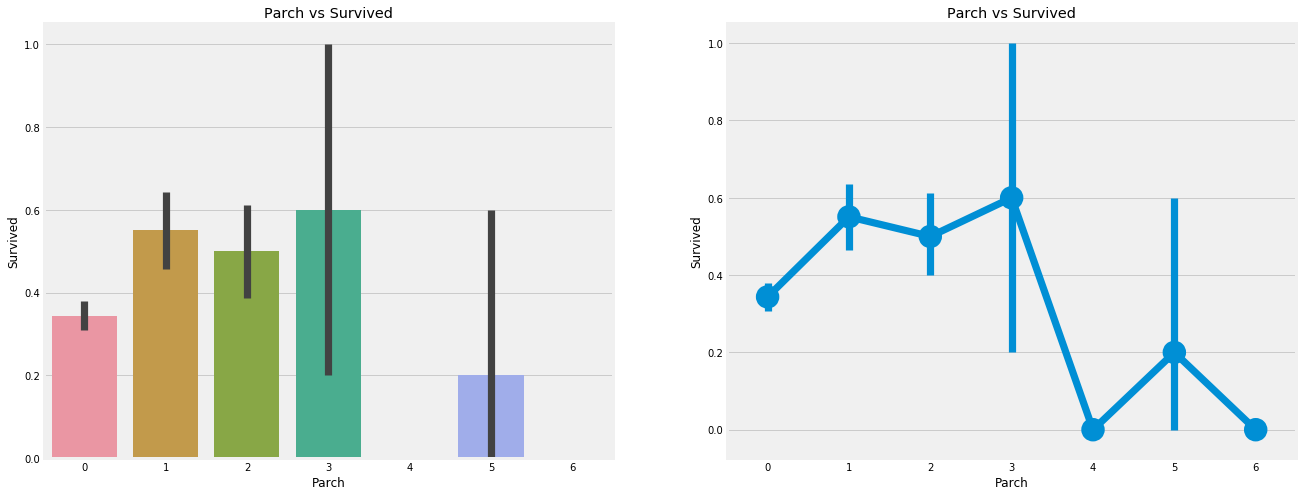

In [57]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=df,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=df,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=df,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=df,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

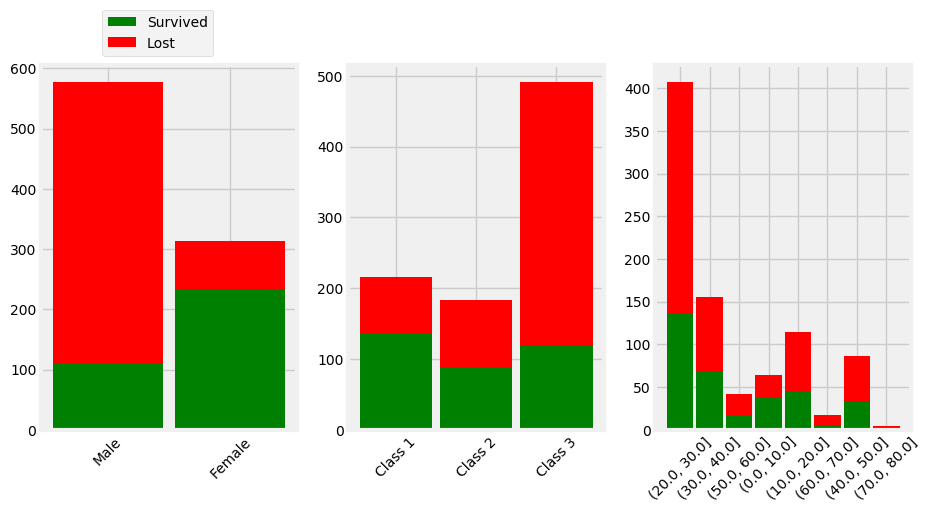

Men survived:  109
Men died:  468
Women survived:  233
Women died:  81
Class 1 survived:  136
Class 1 died:  80
Class 2 survived:  87
Class 2 died:  97
Class 3 survived:  119
Class 3 died:  372
(20.0, 30.0] survived:  136
(20.0, 30.0] died:  271
(30.0, 40.0] survived:  69
(30.0, 40.0] died:  86
(50.0, 60.0] survived:  17
(50.0, 60.0] died:  25
(0.0, 10.0] survived:  38
(0.0, 10.0] died:  26
(10.0, 20.0] survived:  44
(10.0, 20.0] died:  71
(60.0, 70.0] survived:  4
(60.0, 70.0] died:  13
(40.0, 50.0] survived:  33
(40.0, 50.0] died:  53
(70.0, 80.0] survived:  1
(70.0, 80.0] died:  4


In [58]:
df1 = df[['Age', 'Sex', 'Pclass', 'Survived']]

 
df1['Age'] = df1['Age'].fillna(df1['Age'].mean())
survived = df1['Survived'] == 1
survivors_sex = []
survivors_class = []
survivors_age = []
survivors_sex.append(len(df1[(df1['Sex'] == 'male') & (df1['Survived'] == 1)]))
survivors_sex.append(len(df1[(df1['Sex'] == 'female') & (df1['Survived'] == 1)]))
survivors_class.append(len(df1[(df1['Pclass'] == 1) & (df1['Survived'] == 1)]))
survivors_class.append(len(df1[(df1['Pclass'] == 2) & (df1['Survived'] == 1)]))
survivors_class.append(len(df1[(df1['Pclass'] == 3) & (df1['Survived'] == 1)]))
 
lost_sex = []
lost_class = []
lost_age = []
lost_sex.append(len(df1[(df1['Sex'] == 'male') & (df1['Survived'] == 0)]))
lost_sex.append(len(df1[(df1['Sex'] == 'female') & (df1['Survived'] == 0)]))
lost_class.append(len(df1[(df1['Pclass'] == 1) & (df1['Survived'] == 0)]))
lost_class.append(len(df1[(df1['Pclass'] == 2) & (df1['Survived'] == 0)]))
lost_class.append(len(df1[(df1['Pclass'] == 3) & (df1['Survived'] == 0)]))
 
bin_total = 9
bins = np.linspace(0, 80, bin_total)
df1['Age categories']= pd.cut(df1['Age'], bins)
age_unique = df1['Age categories'].unique()
for el in age_unique:
  survivors_age.append(len(df1[(df1['Age categories'] == el) & (df1['Survived'] == 1)]))
  lost_age.append(len(df1[(df1['Age categories'] == el) & (df1['Survived'] == 0)]))
 
bar_width = 0.9
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.gcf().subplots_adjust(bottom=0.15)
 
plt.subplot(131)
xs = np.arange(2)
xlabel = ['Male', 'Female']
plt.xticks(xs, xlabel, rotation='45')
plt.bar(xs, survivors_sex, alpha = 1, color = 'g', width = bar_width, label = 'Survived')
plt.bar(xs, lost_sex, bottom = survivors_sex, alpha = 1, color = 'r', width = bar_width, label = 'Lost')
plt.legend(bbox_to_anchor=(0.7, 1.17))
 
plt.subplot(132)
xs = np.arange(3)
xlabel = ['Class 1', 'Class 2', 'Class 3']
plt.xticks(xs, xlabel, rotation='45')
plt.bar(xs, survivors_class, alpha = 1, color = 'g', width = bar_width)
plt.bar(xs, lost_class, bottom = survivors_class, alpha = 1, color = 'r', width = bar_width)
 
plt.subplot(133)
xs = np.arange(len(survivors_age))
xlabel_age = []
for el in age_unique:
  xlabel_age.append(str(el))
plt.xticks(xs, xlabel_age, rotation='45')
plt.bar(xs, survivors_age, alpha = 1, color = 'g', width = bar_width)
plt.bar(xs, lost_age, bottom = survivors_age, alpha = 1, color = 'r', width = bar_width)
 
plt.show()

print ('Men survived: ',  survivors_sex[0])
print ('Men died: ',  lost_sex[0])
print ('Women survived: ',  survivors_sex[1])
print ('Women died: ',  lost_sex[1])
print ('Class 1 survived: ',  survivors_class[0])
print ('Class 1 died: ',  lost_class[0])
print ('Class 2 survived: ',  survivors_class[1])
print ('Class 2 died: ',  lost_class[1])
print ('Class 3 survived: ',  survivors_class[2])
print ('Class 3 died: ',  lost_class[2])
for i in range(bin_total-1):
    print (age_unique[i], 'survived: ', survivors_age[i])
    print (age_unique[i], 'died: ', lost_age[i])

<p> From the above plots many things can be inferred.
<ul>
<li>The class to which a person somehow matters in survival ie money does play a role in your survival.</li>
<li>Children and Women had a better chance at survival and the younger ones even more because of women and children first policy and it might have been older generation might have wanted the younger generation to live</li>
<li>The number of siblings and if they are travelling with parents or not also contributes to some amount to survival</li>
<li>The port from which they started their journey also plays a role in the survival rate</li>
</ul></p>

<h2>Moving to Prediction</h2>

In [59]:
df['Age_band']=0
df.loc[df['Age']<=15,'Age_band']=0
df.loc[(df['Age']>15)&(df['Age']<=30),'Age_band']=1
df.loc[(df['Age']>30)&(df['Age']<=45),'Age_band']=2
df.loc[(df['Age']>45)&(df['Age']<=60),'Age_band']=3
df.loc[df['Age']>60,'Age_band']=4
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2


In [60]:
df['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,326
0,260
2,202
3,81
4,22


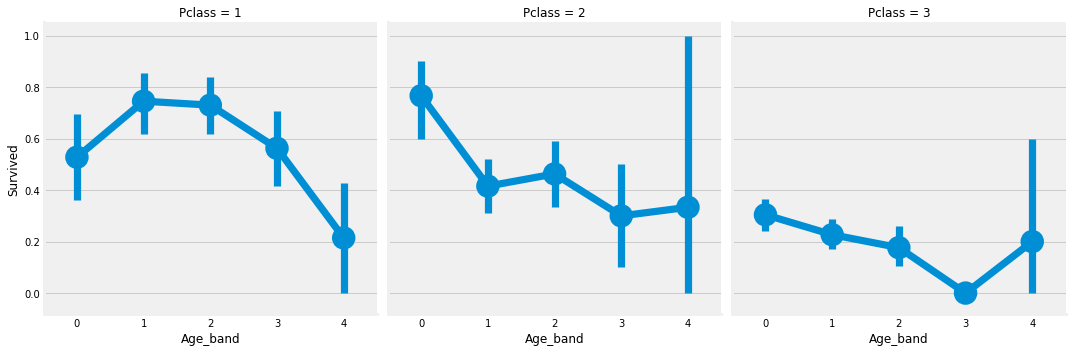

In [61]:
sns.factorplot('Age_band','Survived',data=df,col='Pclass')
plt.show()

<p>There is some sense in the hypothesis that with age survival is decreasing across classes. Maybe a better binning might have set a clear trend but still this does provide some good backing to our hypothesis earlier</p>

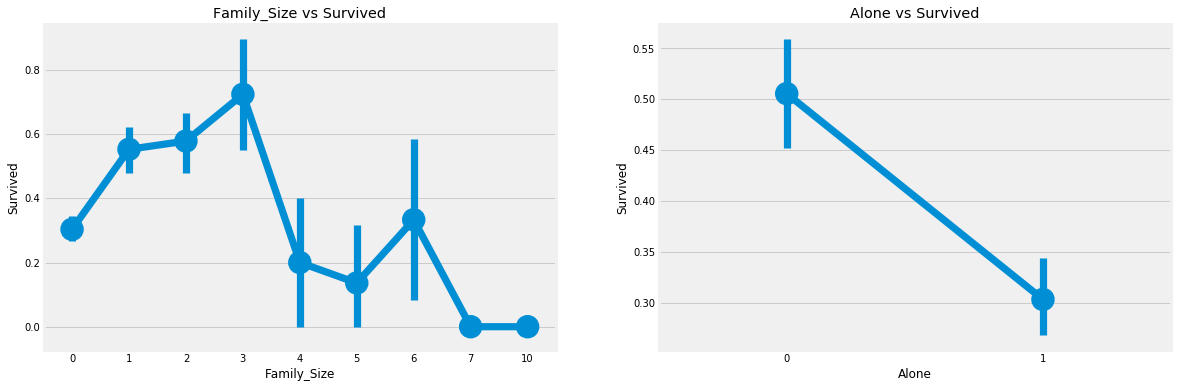

In [62]:
df['Family_Size']=0
df['Family_Size']=df['Parch']+df['SibSp']#family size
df['Alone']=0
df.loc[df.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=df,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=df,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

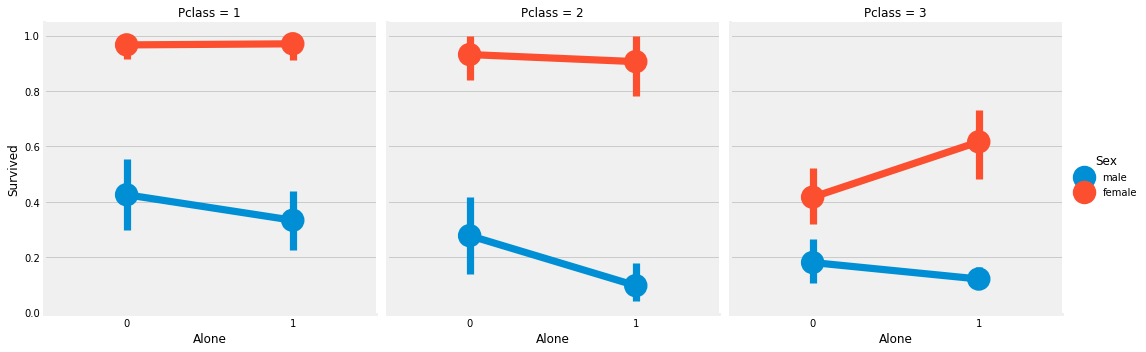

In [63]:
sns.factorplot('Alone','Survived',data=df,hue='Sex',col='Pclass')
plt.show()

<p> These graphics strongly suggests that being alone in that tragedy did not do much good to the loners.</p>

In [64]:
df['Fare_Range']=pd.qcut(df['Fare'],4)
df.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


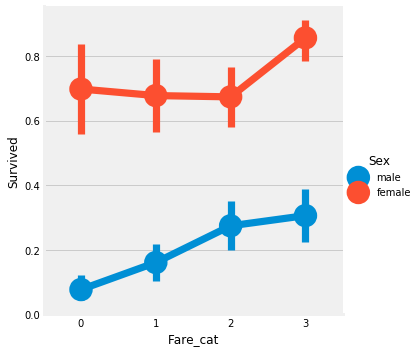

In [65]:
df['Fare_cat']=0
df.loc[df['Fare']<=7.91,'Fare_cat']=0
df.loc[(df['Fare']>7.91)&(df['Fare']<=14.454),'Fare_cat']=1
df.loc[(df['Fare']>14.454)&(df['Fare']<=31),'Fare_cat']=2
df.loc[(df['Fare']>31)&(df['Fare']<=513),'Fare_cat']=3

sns.factorplot('Fare_cat','Survived',data=df,hue='Sex')
plt.show()

<p>Here we can see that the richer the person ( assuming that only the wealthy bought the higher priced ticket) the more the chances he/she survived the sinking

In [66]:

df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')


In [67]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Family_Size,Alone,Fare_Range,Fare_cat,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,"(-0.001, 7.91]",0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,"(31.0, 512.329]",3,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,"(7.91, 14.454]",1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,0,"(31.0, 512.329]",3,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0,1,"(7.91, 14.454]",1,Mr


In [68]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Sex_Code'] = label.fit_transform(df['Sex'])
df['Initial']=label.fit_transform(df['Initial'])

In [69]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Family_Size,Alone,Fare_Range,Fare_cat,Initial,Sex_Code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1,0,"(-0.001, 7.91]",0,12,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,1,0,"(31.0, 512.329]",3,13,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1,"(7.91, 14.454]",1,9,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,1,0,"(31.0, 512.329]",3,13,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,0,1,"(7.91, 14.454]",1,12,1


In [70]:
df['Embarked'].fillna('S',inplace=True)
df['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
df.drop(['Sex'],axis=1,inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Family_Size,Alone,Fare_Range,Fare_cat,Initial,Sex_Code
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,1,0,"(-0.001, 7.91]",0,12,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,2,1,0,"(31.0, 512.329]",3,13,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,1,"(7.91, 14.454]",1,9,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,2,1,0,"(31.0, 512.329]",3,13,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,2,0,1,"(7.91, 14.454]",1,12,1


In [71]:
df = df.rename(columns={'Sex_Code': 'Sex'})
df.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

train,test=train_test_split(df,test_size=0.3,random_state=0,stratify=df['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=df[df.columns[1:]]
Y=df['Survived']

In [72]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Embarked       891 non-null int64
Age_band       891 non-null int64
Family_Size    891 non-null int64
Alone          891 non-null int64
Fare_cat       891 non-null int64
Initial        891 non-null int32
Sex            891 non-null int32
dtypes: int32(2), int64(9)
memory usage: 69.6 KB


,Survived,Pclass,SibSp,Parch,Embarked,Age_band,Family_Size,Alone,Fare_cat,Initial,Sex
0,0,3,1,0,0,1,1,0,0,12,1
1,1,1,1,0,1,2,1,0,3,13,0
2,1,3,0,0,0,1,0,1,1,9,0
3,1,1,1,0,0,2,1,0,3,13,0
4,0,3,0,0,0,2,0,1,1,12,1


In [73]:


model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.832089552238806


In [74]:
model=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.7910447761194029


In [75]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8022388059701493


In [76]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.832089552238806


In [77]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.7835820895522388


In [78]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8246268656716418


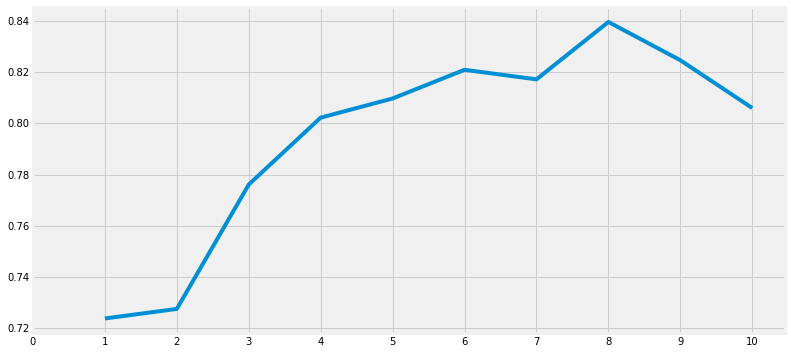

Accuracies for different values of n are: [0.7238806  0.72761194 0.7761194  0.80223881 0.80970149 0.82089552
 0.81716418 0.83955224 0.82462687 0.80597015] with the max value as  0.8395522388059702


In [48]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())



In [79]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=8),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.790087,0.040990
Radial Svm,0.829388,0.036234
Logistic Regression,0.792360,0.030303
KNN,0.817116,0.040505
Decision Tree,0.815943,0.032605
Naive Bayes,0.777828,0.030858
Random Forest,0.828327,0.034555


<p> This shows that RadialSVM and Random Forest are our two best choices out here. Hyperparameters or simply the parameters that are set by default by the developers of the Python Libraries could be tuned to get more accuracy.</p>

<p> The train dataset has a different distribution than the test/validation dataset and population. This might create wide margins between the cross validation (CV) accuracy score and Kaggle submission accuracy score if this approach is actually submitted but it is sure that one of RadialSVM or Random will perform better with accuracy of atleast 80 percent.</p>